# Vectorizing Texts

- Feature engineering for text represenation

In [1]:
import nltk
from nltk.corpus import brown

In [2]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [3]:
corpus_id = brown.fileids(categories=['reviews','fiction','humor'])
corpus_text = [' '.join(w) for w in [brown.words(fileids=cid) for cid in corpus_id]]
print(corpus_text[0][:100])
corpus_cat = [brown.categories(fileids=cid)[0] for cid in corpus_id]

print(len(corpus_text))
print(len(corpus_id))
print(len(corpus_cat))
type(corpus_id)

It is not news that Nathan Milstein is a wizard of the violin . Certainly not in Orchestra Hall wher
55
55
55


list

In [4]:
import numpy as np
import pandas as pd
import re

assert len(corpus_text)==len(corpus_cat)

corpus_df = pd.DataFrame({'Text': corpus_text, 'Category': corpus_cat, 'ID': corpus_id})
corpus_df

,Text,Category,ID
0,It is not news that Nathan Milstein is a wizar...,reviews,cc01
1,Television has yet to work out a living arrang...,reviews,cc02
2,"Francois D'Albert , Hungarian-born violinist w...",reviews,cc03
3,"The Theatre-by-the-Sea , Matunuck , presents `...",reviews,cc04
4,The superb intellectual and spiritual vitality...,reviews,cc05
5,George Kennan's account of relations between R...,reviews,cc06
6,Some of the New York Philharmonic musicians wh...,reviews,cc07
7,Had a funny experience at Newport yesterday af...,reviews,cc08
8,Murray Louis and his dance company appeared at...,reviews,cc09
9,"Ring Of Bright Water , by Gavin Maxwell . 211 ...",reviews,cc10


In [5]:
## Clean up texts
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [6]:
## function
def normalize_text(text):
    ## remove special characters
    text = re.sub(r'[^a-zA-Z\s]','', text, re.I|re.A)
    text = text.lower().strip()
    tokens = wpt.tokenize(text)
    ## filtering
    #tokens_filtered = [w for w in tokens if w not in stop_words and re.search(r'\D+', w)]
    tokens_filtered = tokens
    text_output = ' '.join(tokens_filtered)
    
    return text_output

## vectorize function
normalize_corpus= np.vectorize(normalize_text)

corpus_norm = normalize_corpus(corpus_text)
corpus_norm[1][:200]

'television has yet to work out a living arrangement with jazz which comes to the medium more as an uneasy guest than as a relaxed member of the family there seems to be an unfortunate assumption that '

## Bag of Words

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(min_df=0.2, max_df=1.)
cv_matrix = cv.fit_transform(corpus_norm)
cv_matrix


## view the array
type(cv_matrix)

cv_matrix = cv_matrix.toarray()

vocab = cv.get_feature_names()
boa_unigram = pd.DataFrame(cv_matrix, columns=vocab)
boa_unigram

,able,about,above,across,act,added,after,afternoon,again,against,...,written,wrote,year,years,yes,yet,york,you,young,your
0,1,5,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,3,0,1
1,0,3,0,1,2,0,1,0,1,0,...,0,0,0,4,0,2,1,8,1,4
2,1,3,0,0,1,0,3,0,0,0,...,1,0,0,5,0,0,3,4,2,1
3,0,2,0,0,4,0,2,0,3,0,...,1,0,0,1,0,0,2,0,2,1
4,1,4,1,0,0,0,1,0,1,1,...,1,0,0,0,0,1,0,6,0,2
5,0,11,0,0,0,0,4,0,1,1,...,0,0,1,1,0,1,0,6,0,0
6,1,1,1,0,1,1,6,2,2,0,...,0,1,1,0,1,0,2,0,2,0
7,1,10,0,0,0,0,4,4,3,0,...,0,1,3,1,0,0,0,3,1,2
8,1,1,1,0,0,1,0,0,2,0,...,2,1,0,1,0,2,6,1,2,0
9,0,1,0,1,0,0,3,0,0,1,...,0,0,2,4,0,1,2,4,1,0


## More Complex Bag-of-Words

- Filter features based on word classes
- Include n-gram features

## Bag of N-grams Model

In [8]:
## N-grams

cv_ngram = CountVectorizer(ngram_range=(1,3), min_df = 0.2)
cv_ngram_matrix = cv_ngram.fit_transform(corpus_norm)

boa_ngram = pd.DataFrame(cv_ngram_matrix.toarray(),columns = cv_ngram.get_feature_names())
boa_ngram.head()

,able,able to,about,about it,about the,above,across,across the,act,added,...,yet,york,you,you are,you can,you could,you have,you know,young,your
0,1,0,5,0,3,0,0,0,0,0,...,1,0,3,0,0,0,0,0,0,1
1,0,0,3,0,0,0,1,0,2,0,...,2,1,8,1,0,0,1,0,1,4
2,1,0,3,0,0,0,0,0,1,0,...,0,3,4,1,0,0,1,0,2,1
3,0,0,2,0,1,0,0,0,4,0,...,0,2,0,0,0,0,0,0,2,1
4,1,1,4,1,1,1,0,0,0,0,...,1,0,6,0,1,1,1,0,0,2


## TF-IDF Model

In [9]:
from sklearn.feature_extraction.text import TfidfTransformer
tf = TfidfTransformer(norm = 'l2', use_idf=True)
tf_matrix = tf.fit_transform(cv_matrix)

tfidf_unigram = pd.DataFrame(tf_matrix.toarray(), columns = cv.get_feature_names())
tfidf_unigram

,able,about,above,across,act,added,after,afternoon,again,against,...,written,wrote,year,years,yes,yet,york,you,young,your
0,0.009462,0.024754,0.000000,0.000000,0.000000,0.000000,0.005318,0.000000,0.005614,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.008088,0.000000,0.016540,0.000000,0.007161
1,0.000000,0.014533,0.000000,0.008444,0.022309,0.000000,0.005204,0.000000,0.005493,0.000000,...,0.000000,0.000000,0.000000,0.024528,0.000000,0.015829,0.009042,0.043160,0.007592,0.028028
2,0.009405,0.014763,0.000000,0.000000,0.011331,0.000000,0.015859,0.000000,0.000000,0.000000,...,0.011331,0.000000,0.000000,0.031143,0.000000,0.000000,0.027553,0.021920,0.015424,0.007117
3,0.000000,0.010555,0.000000,0.000000,0.048609,0.000000,0.011339,0.000000,0.017954,0.000000,...,0.012152,0.000000,0.000000,0.006680,0.000000,0.000000,0.019701,0.000000,0.016542,0.007634
4,0.009887,0.020690,0.009887,0.000000,0.000000,0.000000,0.005557,0.000000,0.005866,0.008821,...,0.011910,0.000000,0.000000,0.000000,0.000000,0.008451,0.000000,0.034563,0.000000,0.014963
5,0.000000,0.046936,0.000000,0.000000,0.000000,0.000000,0.018335,0.000000,0.004839,0.007276,...,0.000000,0.000000,0.008356,0.005401,0.000000,0.006971,0.000000,0.028511,0.000000,0.000000
6,0.009412,0.004924,0.009412,0.000000,0.011338,0.012071,0.031740,0.018824,0.011168,0.000000,...,0.000000,0.011338,0.009644,0.000000,0.010704,0.000000,0.018382,0.000000,0.015434,0.000000
7,0.009725,0.050883,0.000000,0.000000,0.000000,0.000000,0.021865,0.038902,0.017310,0.000000,...,0.000000,0.011716,0.029895,0.006441,0.000000,0.000000,0.000000,0.017000,0.007974,0.014719
8,0.008883,0.004648,0.008883,0.000000,0.000000,0.011393,0.000000,0.000000,0.010540,0.000000,...,0.021403,0.010701,0.000000,0.005883,0.000000,0.015186,0.052047,0.005176,0.014567,0.000000
9,0.000000,0.004898,0.000000,0.008538,0.000000,0.000000,0.015786,0.000000,0.000000,0.008353,...,0.000000,0.000000,0.019186,0.024800,0.000000,0.008003,0.018285,0.021820,0.007677,0.000000


In [10]:
tf_matrix2 = tf.fit_transform(cv_ngram_matrix)
tfidf_ngram = pd.DataFrame(tf_matrix2.toarray(), columns = cv_ngram.get_feature_names())
tfidf_ngram

,able,able to,about,about it,about the,above,across,across the,act,added,...,yet,york,you,you are,you can,you could,you have,you know,young,your
0,0.009217,0.000000,0.024112,0.000000,0.023146,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.007878,0.000000,0.016111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006975
1,0.000000,0.000000,0.014143,0.000000,0.000000,0.000000,0.008217,0.000000,0.021710,0.000000,...,0.015404,0.008799,0.042001,0.011192,0.000000,0.000000,0.010248,0.000000,0.007388,0.027275
2,0.009164,0.000000,0.014384,0.000000,0.000000,0.000000,0.000000,0.000000,0.011040,0.000000,...,0.000000,0.026847,0.021358,0.011383,0.000000,0.000000,0.010422,0.000000,0.015028,0.006935
3,0.000000,0.000000,0.010331,0.000000,0.008264,0.000000,0.000000,0.000000,0.047577,0.000000,...,0.000000,0.019283,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016191,0.007472
4,0.009664,0.011305,0.020224,0.011642,0.008089,0.009664,0.000000,0.000000,0.000000,0.000000,...,0.008260,0.000000,0.033784,0.000000,0.010990,0.012003,0.010990,0.000000,0.000000,0.014626
5,0.000000,0.000000,0.045861,0.009600,0.020010,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.006811,0.000000,0.027858,0.000000,0.009063,0.000000,0.009063,0.000000,0.000000,0.000000
6,0.009253,0.010825,0.004841,0.000000,0.000000,0.009253,0.000000,0.000000,0.011147,0.011867,...,0.000000,0.018072,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015174,0.000000
7,0.009444,0.011048,0.049410,0.000000,0.015810,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.016508,0.000000,0.000000,0.000000,0.010740,0.000000,0.007743,0.014293
8,0.008653,0.000000,0.004527,0.000000,0.000000,0.008653,0.000000,0.000000,0.000000,0.011097,...,0.014792,0.050696,0.005041,0.000000,0.000000,0.000000,0.000000,0.000000,0.014189,0.000000
9,0.000000,0.000000,0.004790,0.000000,0.007663,0.000000,0.008349,0.008940,0.000000,0.000000,...,0.007826,0.017881,0.021338,0.000000,0.010412,0.000000,0.000000,0.000000,0.007507,0.000000


- We can also create TF-IDF model directly from corpus

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df = 0.2,
                     ngram_range=(1,3), 
                     use_idf=True
                    )
tv_matrix = tv.fit_transform(corpus_norm)
tfidf_ngram2 = pd.DataFrame(tv_matrix.toarray(), columns=tv.get_feature_names())
tfidf_ngram2

,able,able to,about,about it,about the,above,across,across the,act,added,...,yet,york,you,you are,you can,you could,you have,you know,young,your
0,0.009217,0.000000,0.024112,0.000000,0.023146,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.007878,0.000000,0.016111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006975
1,0.000000,0.000000,0.014143,0.000000,0.000000,0.000000,0.008217,0.000000,0.021710,0.000000,...,0.015404,0.008799,0.042001,0.011192,0.000000,0.000000,0.010248,0.000000,0.007388,0.027275
2,0.009164,0.000000,0.014384,0.000000,0.000000,0.000000,0.000000,0.000000,0.011040,0.000000,...,0.000000,0.026847,0.021358,0.011383,0.000000,0.000000,0.010422,0.000000,0.015028,0.006935
3,0.000000,0.000000,0.010331,0.000000,0.008264,0.000000,0.000000,0.000000,0.047577,0.000000,...,0.000000,0.019283,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016191,0.007472
4,0.009664,0.011305,0.020224,0.011642,0.008089,0.009664,0.000000,0.000000,0.000000,0.000000,...,0.008260,0.000000,0.033784,0.000000,0.010990,0.012003,0.010990,0.000000,0.000000,0.014626
5,0.000000,0.000000,0.045861,0.009600,0.020010,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.006811,0.000000,0.027858,0.000000,0.009063,0.000000,0.009063,0.000000,0.000000,0.000000
6,0.009253,0.010825,0.004841,0.000000,0.000000,0.009253,0.000000,0.000000,0.011147,0.011867,...,0.000000,0.018072,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015174,0.000000
7,0.009444,0.011048,0.049410,0.000000,0.015810,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.016508,0.000000,0.000000,0.000000,0.010740,0.000000,0.007743,0.014293
8,0.008653,0.000000,0.004527,0.000000,0.000000,0.008653,0.000000,0.000000,0.000000,0.011097,...,0.014792,0.050696,0.005041,0.000000,0.000000,0.000000,0.000000,0.000000,0.014189,0.000000
9,0.000000,0.000000,0.004790,0.000000,0.007663,0.000000,0.008349,0.008940,0.000000,0.000000,...,0.007826,0.017881,0.021338,0.000000,0.010412,0.000000,0.000000,0.000000,0.007507,0.000000


## Document Similarity

- Cluster analysis with R seems more intuitive to me

In [12]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,1.000000,0.903099,0.901749,0.901110,0.907569,0.930193,0.874775,0.894402,0.919195,0.918026,...,0.774057,0.861176,0.731567,0.844309,0.757781,0.843069,0.879384,0.712273,0.938602,0.866187
1,0.903099,1.000000,0.871965,0.867151,0.880732,0.913532,0.861910,0.902770,0.887822,0.877728,...,0.784384,0.841174,0.729602,0.828479,0.717505,0.830369,0.836896,0.694544,0.907940,0.852431
2,0.901749,0.871965,1.000000,0.905119,0.873995,0.901962,0.883693,0.882181,0.896813,0.889755,...,0.786636,0.821484,0.770126,0.842209,0.727968,0.815429,0.854184,0.710397,0.888556,0.842170
3,0.901110,0.867151,0.905119,1.000000,0.887274,0.898775,0.872573,0.882392,0.895758,0.890735,...,0.780414,0.825479,0.750377,0.848413,0.720307,0.813878,0.852632,0.694705,0.899165,0.838796
4,0.907569,0.880732,0.873995,0.887274,1.000000,0.907642,0.840482,0.865856,0.884396,0.913948,...,0.782834,0.862465,0.739062,0.856936,0.783967,0.854642,0.876750,0.717906,0.910563,0.878084
5,0.930193,0.913532,0.901962,0.898775,0.907642,1.000000,0.874888,0.896952,0.915662,0.923222,...,0.783759,0.849392,0.744431,0.842141,0.746043,0.840681,0.871048,0.702883,0.931814,0.865160
6,0.874775,0.861910,0.883693,0.872573,0.840482,0.874888,1.000000,0.860151,0.882502,0.852995,...,0.752524,0.796356,0.742264,0.828274,0.704168,0.770870,0.818364,0.670490,0.864791,0.816389
7,0.894402,0.902770,0.882181,0.882392,0.865856,0.896952,0.860151,1.000000,0.878723,0.877895,...,0.799398,0.859184,0.767273,0.847824,0.746111,0.826701,0.843524,0.740893,0.896333,0.845723
8,0.919195,0.887822,0.896813,0.895758,0.884396,0.915662,0.882502,0.878723,1.000000,0.883385,...,0.761283,0.827417,0.731610,0.825890,0.745811,0.822658,0.854792,0.682048,0.910304,0.840261
9,0.918026,0.877728,0.889755,0.890735,0.913948,0.923222,0.852995,0.877895,0.883385,1.000000,...,0.765622,0.859278,0.729147,0.838511,0.755803,0.839939,0.859853,0.695509,0.920241,0.863758


In [13]:
%load_ext rpy2.ipython

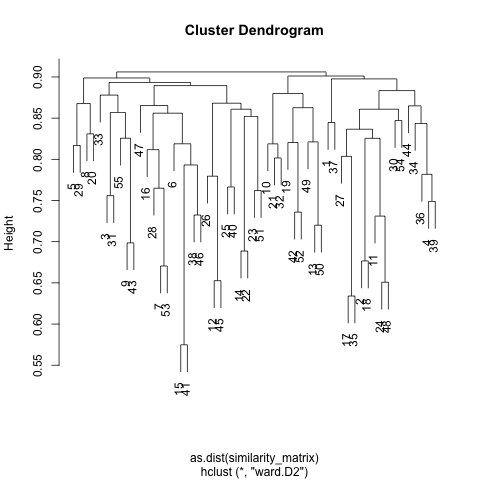

In [108]:
%%R -i similarity_matrix
library(dplyr)
#library(ggplot2)

head(similarity_matrix)
hclust(as.dist(similarity_matrix),method="ward.D2") %>%
plot

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [45.0, 45.0, 62.5, 62.5],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [95.0, 95.0, 112.5, 112.5],
  [85.0, 85.0, 103.75, 103.75],
  [53.75, 53.75, 94.375, 94.375],
  [20.0, 20.0, 74.0625, 74.0625],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [152.5, 152.5, 182.5, 182.5],
  [135.0, 135.0, 167.5, 167.5],
  [205.0, 205.0, 215.0, 215.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [225.0, 225.0, 242.5, 242.5],
  [265.0, 265.0, 275.0, 275.0],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [270.0, 270.0, 292.5, 292.5],
  [233.75, 233.75, 281.25, 281.25],
  [210.0, 210.0, 257.5, 257.5],
  [151.25, 151.25, 233.75, 233.75],
  [315.0, 315.0, 325.0, 325.0],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.

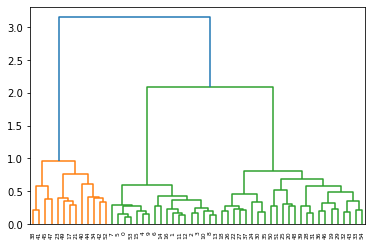

In [111]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(similarity_matrix, 'ward')
pd.DataFrame(Z)

# but to draw dendrogram?
dendrogram(Z)
# Don't like the graph in python